In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf




In [3]:

import numpy as np

In [4]:
import tensorflow as tf


In [5]:
!pip install tensorflow matplotlib


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=40



In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"C:/Users/User/potato dataset/Training",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 1 2 1 0 0 1 1 0 0 1 1 1 1 1 1 1 2 1 0 1 1 0 1 1 0 2 0 1 0 0]


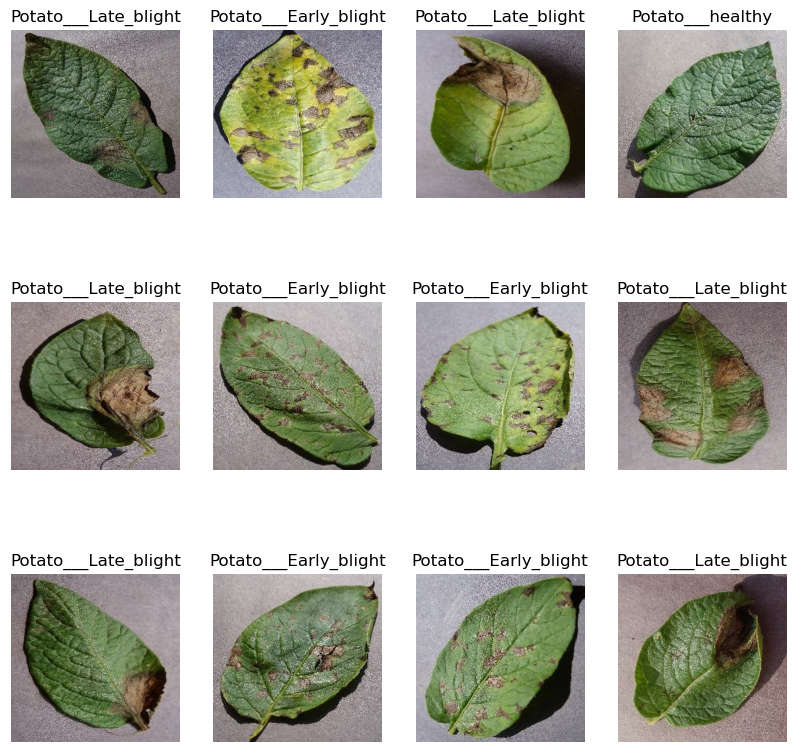

In [10]:
### data visulation
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(81)
len(train_ds)

68

In [13]:
test_ds=dataset.skip(81)
len(test_ds)

0

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=test_ds.take(10)
len(val_ds)

0

In [16]:
test_ds=test_ds.skip(10)
len(test_ds)

0

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size=len(ds)
    
    if shuffle:
         ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)
    
    

[[[0.8156863  0.79607844 0.8117647 ]
  [0.7882353  0.76862746 0.78431374]
  [0.7607843  0.7411765  0.75686276]
  ...
  [0.70980394 0.69803923 0.7254902 ]
  [0.7372549  0.7254902  0.7529412 ]
  [0.7176471  0.7058824  0.73333335]]

 [[0.827451   0.80784315 0.8235294 ]
  [0.8039216  0.78431374 0.8       ]
  [0.78039217 0.7607843  0.7764706 ]
  ...
  [0.7176471  0.7058824  0.73333335]
  [0.7411765  0.7294118  0.75686276]
  [0.7137255  0.7019608  0.7294118 ]]

 [[0.827451   0.80784315 0.8235294 ]
  [0.80784315 0.7882353  0.8039216 ]
  [0.7882353  0.76862746 0.78431374]
  ...
  [0.7254902  0.7137255  0.7411765 ]
  [0.7411765  0.7294118  0.75686276]
  [0.70980394 0.69803923 0.7254902 ]]

 ...

 [[0.69411767 0.6745098  0.69803923]
  [0.5882353  0.5686275  0.5921569 ]
  [0.6627451  0.6431373  0.6666667 ]
  ...
  [0.5254902  0.5058824  0.53333336]
  [0.6        0.5803922  0.60784316]
  [0.6117647  0.5921569  0.61960787]]

 [[0.61960787 0.6        0.62352943]
  [0.5294118  0.50980395 0.53333336]


In [24]:
### normalizing
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
#data agumentation
#zoom_range=(0.2,0.8)
data_augmentation=tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    #layers.experimental.preprocessing.RandomContrast(0.5,1.5),
    #layers.experimental.preprocessing.RandomZoom(height_factor=zoom_range, width_factor=zoom_range)
     ])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])


In [29]:
history = model.fit(train_ds, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds, verbose=1)

Epoch 1/40


54/54 [==============================] - 108s 2s/step - loss: 0.9245 - accuracy: 0.4693 - val_loss: 0.8814 - val_accuracy: 0.4919
Epoch 2/40
54/54 [==============================] - 97s 2s/step - loss: 0.8169 - accuracy: 0.5909 - val_loss: 0.6410 - val_accuracy: 0.7344
Epoch 3/40
54/54 [==============================] - 98s 2s/step - loss: 0.5511 - accuracy: 0.7523 - val_loss: 0.5644 - val_accuracy: 0.7535
Epoch 4/40
54/54 [==============================] - 100s 2s/step - loss: 0.4146 - accuracy: 0.8177 - val_loss: 0.3849 - val_accuracy: 0.8264
Epoch 5/40
54/54 [==============================] - 94s 2s/step - loss: 0.2944 - accuracy: 0.8889 - val_loss: 0.2381 - val_accuracy: 0.9126
Epoch 6/40
54/54 [==============================] - 97s 2s/step - loss: 0.2402 - accuracy: 0.9034 - val_loss: 0.2298 - val_accuracy: 0.9086
Epoch 7/40
54/54 [==============================] - 101s 2s/step - loss: 0.2272 - accuracy: 0.9207 - val_loss: 0.2670 - val_accuracy: 0.8987
Epoch 8/40
54/5

In [30]:
# evaluating the scores
scores = model.evaluate(train_ds)
scores

54/54 [==============================] - 14s 254ms/step - loss: 0.0923 - accuracy: 0.9705


[0.09231315553188324, 0.9704861044883728]

In [31]:
# getting the keys of fitted model "History"
history.params, history.history.keys()

({'verbose': 1, 'epochs': 40, 'steps': 54},
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [32]:
# assigning names to the keys
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

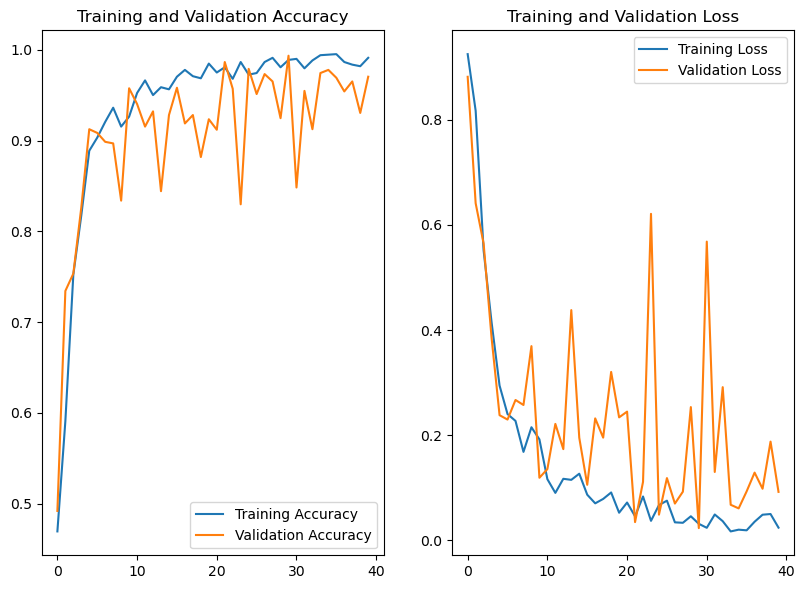

In [33]:
# plotting the comparison graphs
plt.figure(figsize = (15,15))

# Accuracy Table
plt.subplot(2,3,1)
plt.plot(range(EPOCHS),train_acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Table
plt.subplot(2,3,2)
plt.plot(range(EPOCHS),train_loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf

1/1 [==============================] - 0s 268ms/step
Normalized confusion matrix


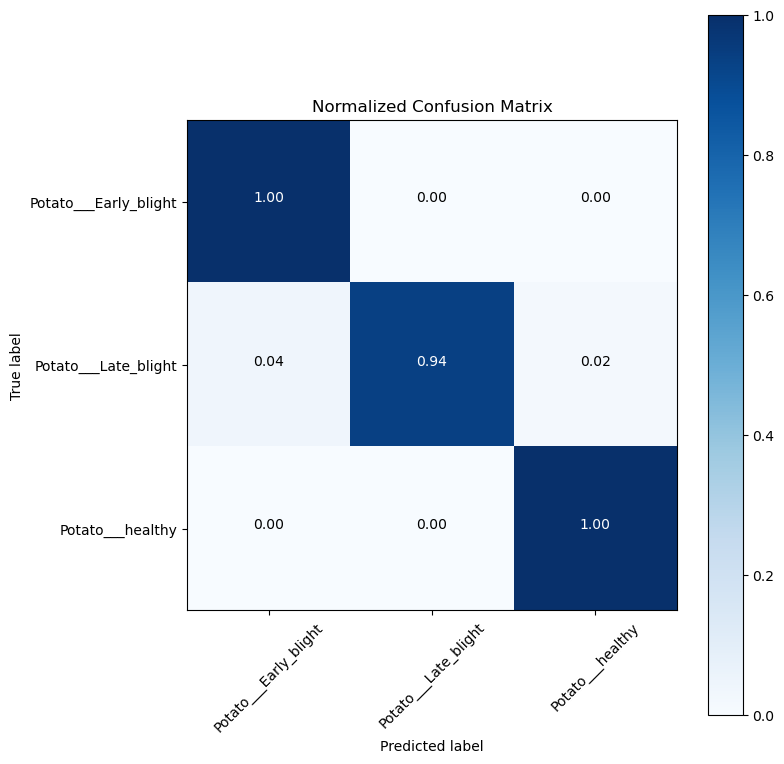

In [35]:
# Function to get true and predicted labels
def get_true_and_predicted_labels(model, dataset):
    true_labels = []
    predicted_labels = []

    for images, labels in dataset:
        true_labels.extend(labels.numpy())
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))

    return true_labels, predicted_labels

# Get true and predicted labels
true_labels, predicted_labels = get_true_and_predicted_labels(model, test_ds)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True, title='Normalized Confusion Matrix')
plt.show()


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have the true_labels and predicted_labels
true_labels, predicted_labels

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f'Recall: {recall:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 286ms/step
predicted label: Potato___Early_blight


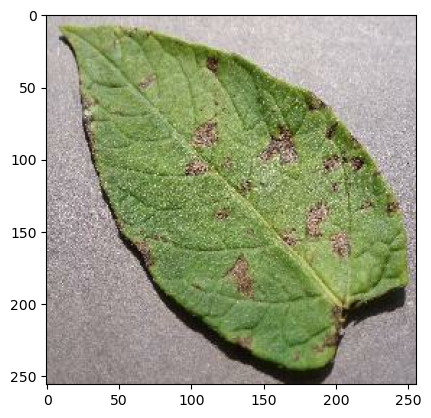

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


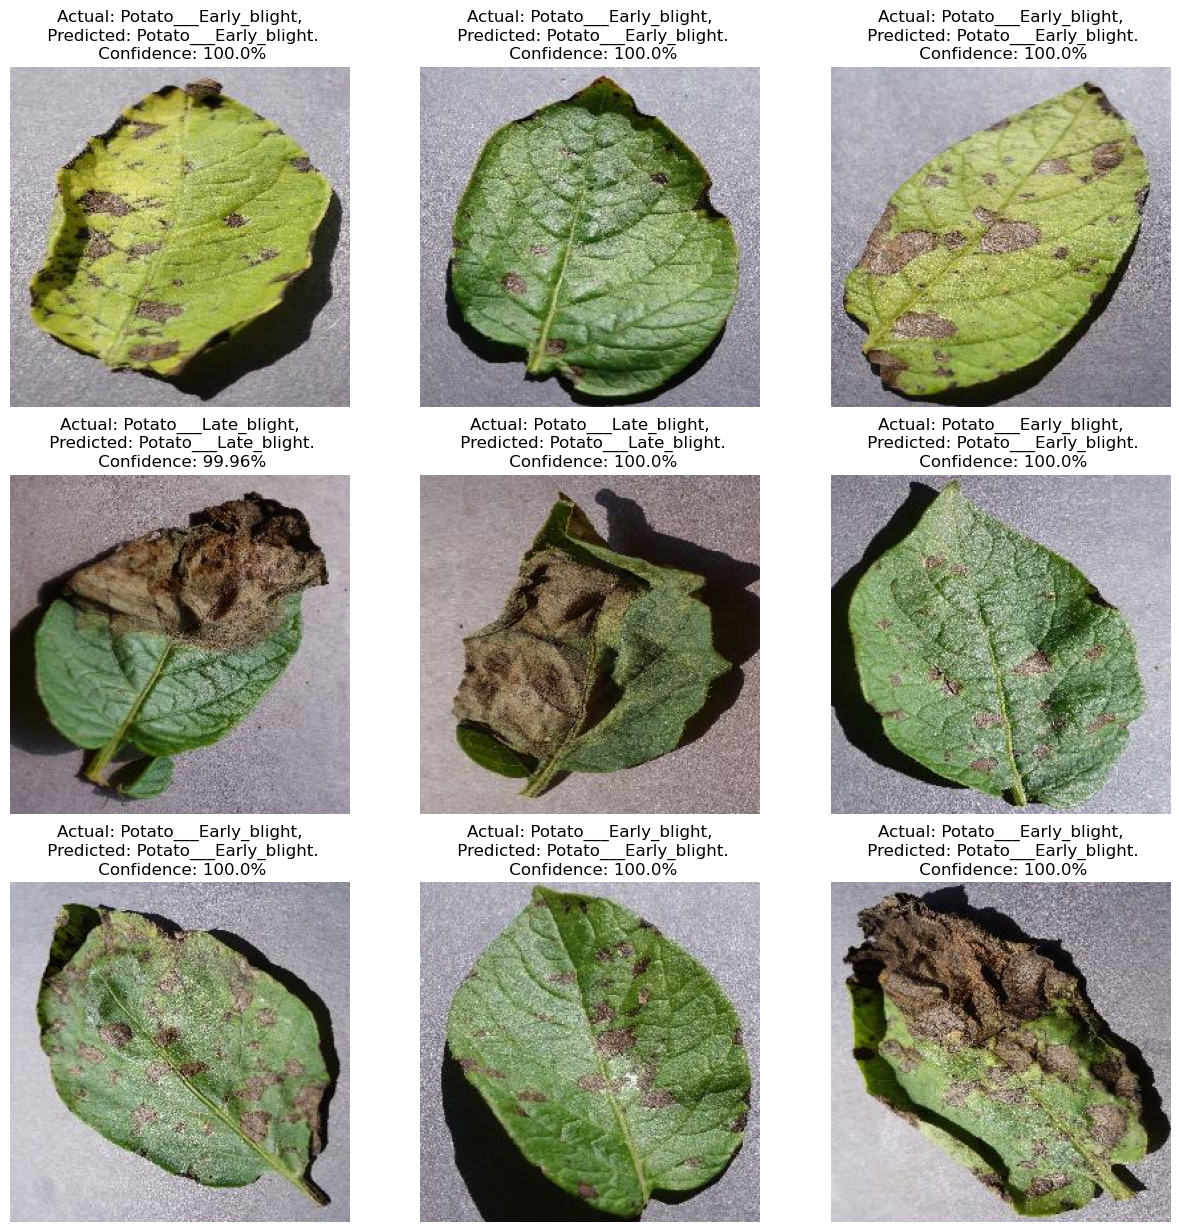

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
model.save("../CNN_P.h5")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 300 files belonging to 3 classes.
1/1 [==============================] - 0s 310ms/step


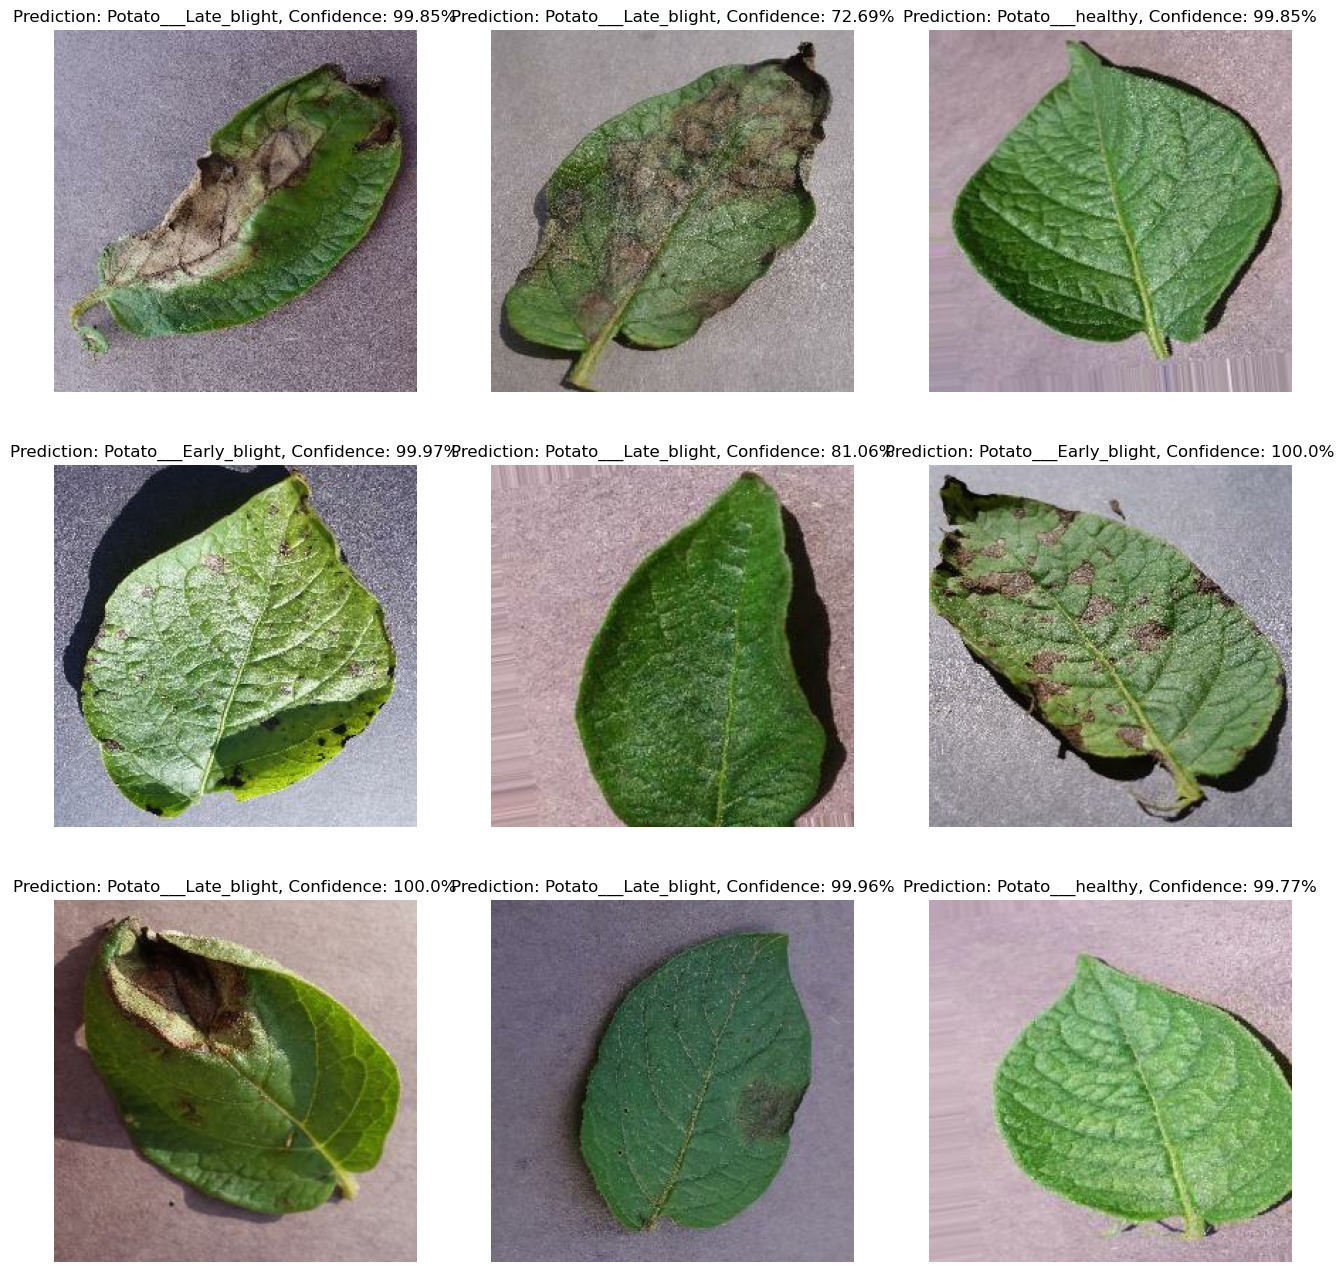

In [41]:
# Importing new dataset for new predictions
unk_lf = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/User/archive (1)/Potato/Test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

#store the class names of the new dataset
class_names_unk = class_names

# Make predictions on the unknown leaf dataset
predictions_unk = model.predict(unk_lf)

# Plotting batch of unknown leaf images with predicted labels and confidence
plt.figure(figsize=(16, 16))

# Get a batch of unknown leaf images and labels
for batch_images_unk, _ in unk_lf.take(1):
    # Get predictions for the entire batch
    batch_predictions_unk = model.predict(batch_images_unk)

    for i in range(min(9, len(batch_images_unk))):  # Display at most 9 images
        ax = plt.subplot(3, 3, i + 1)
        image_unk = batch_images_unk[i].numpy().astype('uint8')

        # Get the predicted class index for the current image
        predicted_class_index_unk = np.argmax(batch_predictions_unk[i])

        # Get the predicted class name and confidence
        predicted_class_unk = class_names_unk[predicted_class_index_unk]
        confidence_unk = round(batch_predictions_unk[i][predicted_class_index_unk] * 100, 2)

        plt.imshow(image_unk)
        plt.title(f'Prediction: {predicted_class_unk}, Confidence: {confidence_unk}%')
        plt.axis('off')

plt.show()